# Lead score case study

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns


# Styling the plot
style.use('ggplot')
sns.set_style('whitegrid')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
# Adjusting Output Views
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor





In [3]:
# Importing the dataset
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Null Value and Data Information
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Checking Duplicate Values in 'Prospect ID'
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

In [9]:
# 'Lead Number'
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

So we can conclude that there are no duplicates in 'Prospect ID' and 'Lead number'

In [8]:
# Dropping these columns as we don't fit these in the model
col_to_drop = ['Prospect ID', 'Lead Number']

In [10]:
Lead_Number = leads['Lead Number']

## Data cleaning and missing values

In [12]:
# Converting 'Select' values in the data set as null 
leads = leads.replace('Select', np.nan)

In [14]:
# Calculating the percentage of null values
round(100*leads.isna().sum()/len(leads),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

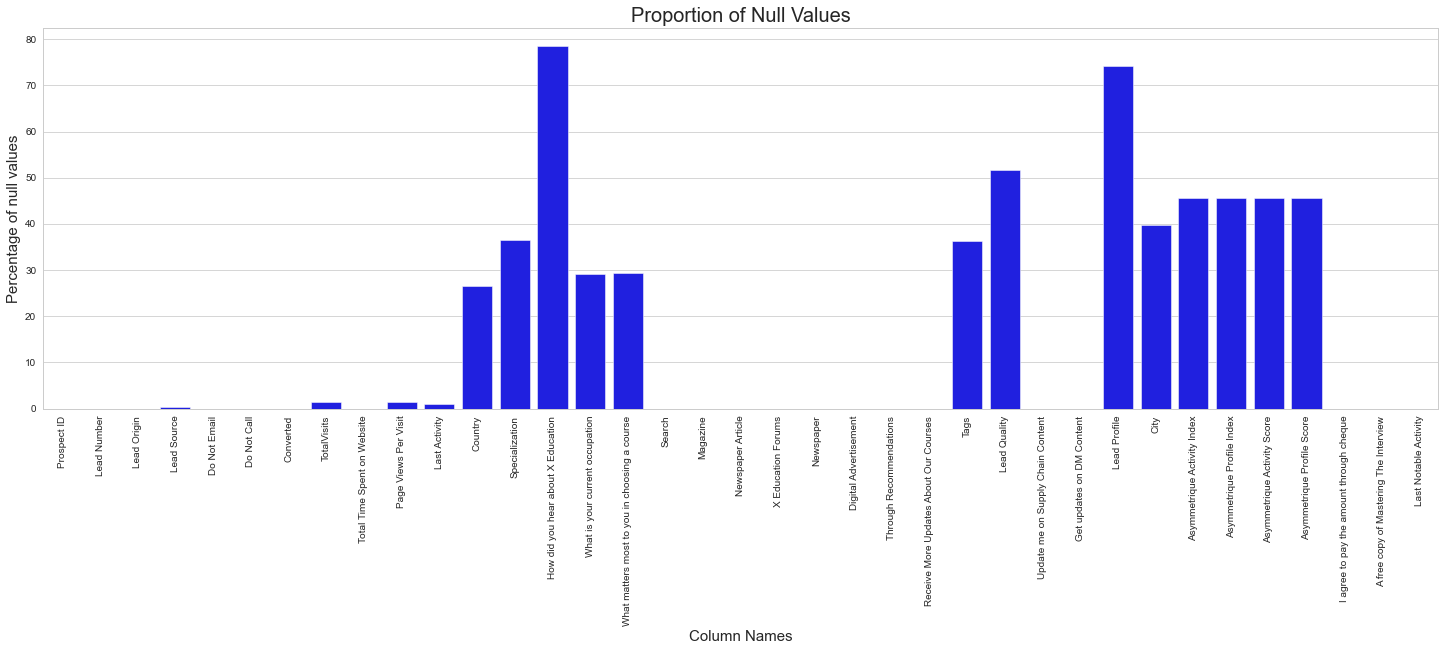

In [16]:
#Plotting a bar graph to look at the proportion of null values less than 40%
plt.figure(figsize = [25,7])
plt.title("Proportion of Null Values",fontsize=20)
plt.xlabel("Column Names", fontsize=15)
plt.ylabel("Percentage of null values", fontsize= 15)
plt.xticks(rotation=90)
ax = sns.barplot(leads.columns,round((leads.isnull().sum()/leads.shape[0])*100,2), color = 'blue')
plt.show()

In [18]:
#Now let us drop columns having null values more than 40%
cols = leads.columns

for i in cols:
    if((100*leads[i].isnull().sum()/len(leads.index)) >= 40):
        leads.drop(i, axis = 1, inplace = True)

In [19]:
round((leads.isnull().sum()/len(leads)*100), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

## Data preparation 

In [22]:
#Let's analyze each variable 
# City
leads['City'].value_counts(dropna = False)



Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [24]:
# Replacing na values for city with Maharashtra
leads['City'].fillna('Mumbai', inplace = True)

In [27]:
leads['City'].value_counts(dropna = False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [28]:
#checking value counts of Country column
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [30]:
# Replacing null values in Country column with mode 'India'
leads['Country'].fillna('India', inplace = True)

In [31]:
leads['Country'].isna().sum()


0

In [32]:
leads['Country'] = leads['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
leads['Country'].value_counts()

India            8953
Outside India     287
Name: Country, dtype: int64

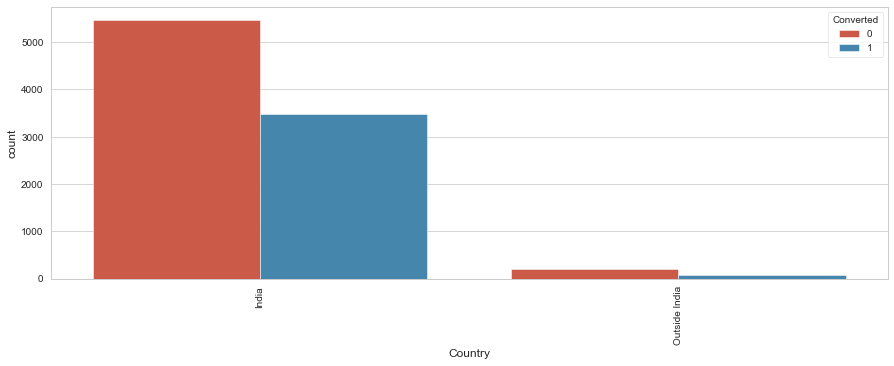

In [33]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
p1=sns.countplot(leads.Country, hue=leads.Converted)
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

As the number of Values for India are quite high, we can drop this column

In [34]:
drop_cols=['Country']

In [35]:
# Specialization column
leads['Specialization'].value_counts(dropna=False)


NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [36]:
#Replacing null values with 'Not specified'
leads['Specialization'].fillna('Not Specified', inplace = True)

In [38]:
#combining Management Specializations because they show similar trends
leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

<AxesSubplot:xlabel='Converted', ylabel='Specialization'>

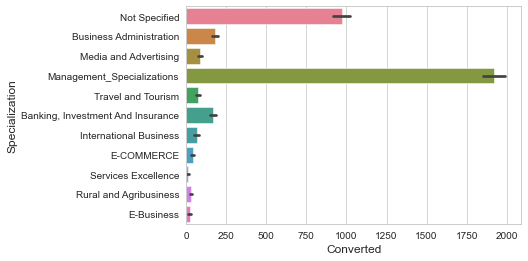

In [39]:
#plotting the Specialization columnn 
sns.barplot(y='Specialization', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [40]:
#'What is your current occupation' column
leads['What is your current occupation'].value_counts(dropna=False) 

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [41]:
# Filling null values with 'Unemployed'
leads['What is your current occupation'].fillna('Unemployed', inplace = True)

In [42]:
#'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].value_counts(dropna=False) 

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [43]:
# We see many people opt for a course for better career prospects, we replace the null value with the same
leads['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace = True)


<AxesSubplot:xlabel='Converted', ylabel='What matters most to you in choosing a course'>

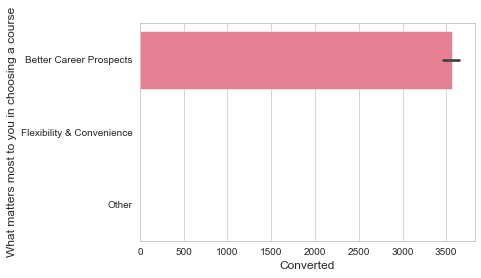

In [46]:
sns.barplot(y='What matters most to you in choosing a course', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [47]:
#This column can be dropped
drop_cols.append('What matters most to you in choosing a course')
drop_cols

['Country',
 'What matters most to you in choosing a course',
 'What matters most to you in choosing a course']

In [48]:
# 'Tags' column
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [49]:
# Replacing Tags with mode
leads['Tags'].fillna('Not Specified', inplace = True)

In [50]:
# Grouping values with low count in order to remove bias
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                       'invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')



<AxesSubplot:xlabel='Converted', ylabel='Tags'>

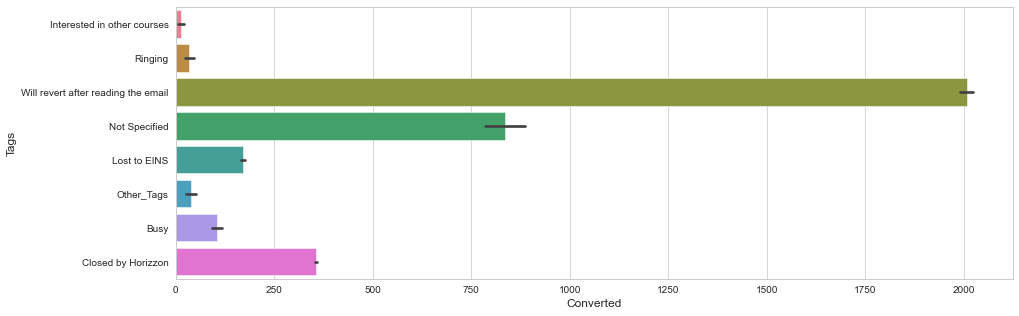

In [51]:
#Plotting the tag column
plt.figure(figsize=(15,5))
sns.barplot(y='Tags', x='Converted', palette='husl', data=leads, estimator=np.sum)

In [52]:
#checking value counts of Lead Source column
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [53]:
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads','testone','NC_EDM'] ,'Others')

leads['Lead Source'] = leads['Lead Source'].replace('44','Social Media')

In [54]:
# 'Last Activity' column
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [55]:
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                        'View in browser link Clicked', 'Email Marked Spam','Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [56]:
leads['Lead Source'].fillna('Others', inplace = True)
leads['Last Activity'].fillna('Others', inplace = True)

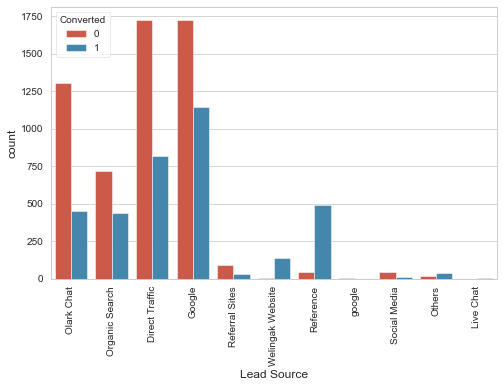

In [58]:
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [59]:
#Imputing them with median values because continous varibles have outliers 
leads['TotalVisits'].replace(np.NaN, leads['TotalVisits'].median(), inplace =True)
leads['Page Views Per Visit'].replace(np.NaN, leads['Page Views Per Visit'].median(), inplace =True)

In [60]:
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

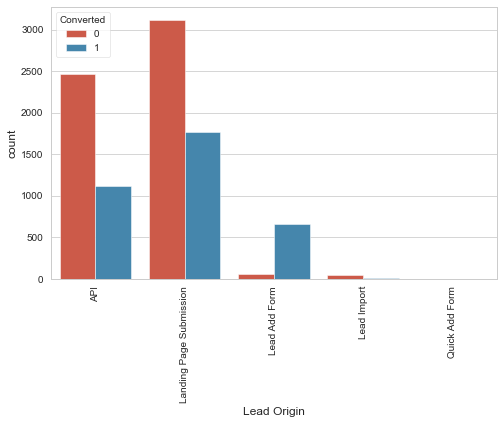

In [61]:
#visualizing count of Lead Source based on Converted value
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

1.Lead Add Form has a very high conversion rate.
2.count of leads are not very high.
3.Lead Import and Quick Add Form get very few leads.

In [62]:
leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [63]:
#Let's drop ' Do Not Call' column since 95% are same one value
drop_cols.append('Do Not Call')
drop_cols

['Country',
 'What matters most to you in choosing a course',
 'What matters most to you in choosing a course',
 'Do Not Call']

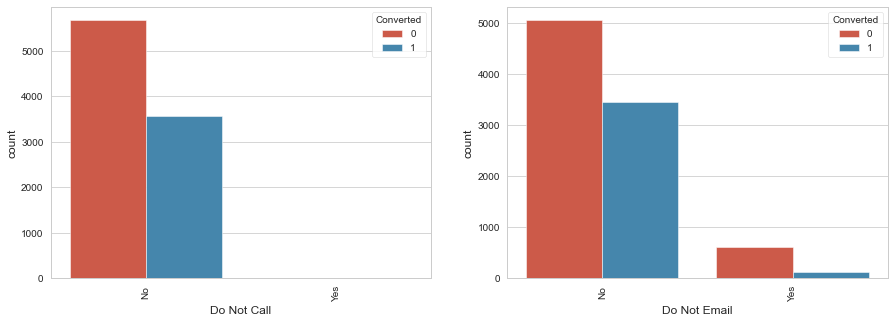

In [66]:
##visualizing count of Do Not Email & Do Not Call based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [68]:
# 'Do Not Email' column
leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

IMBALANCED VARIABLES THAT CAN BE DROPPED

In [69]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [70]:
leads['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [71]:
leads.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [72]:
leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [73]:
leads['Digital Advertisement'].value_counts(dropna=False)


No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [74]:
leads['Through Recommendations'].value_counts(dropna=False)


No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [75]:
leads['Newspaper'].value_counts(dropna=False)


No     9239
Yes       1
Name: Newspaper, dtype: int64

In [76]:
leads['Get updates on DM Content'].value_counts(dropna=False)


No    9240
Name: Get updates on DM Content, dtype: int64

In [77]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)


No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [78]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)


No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [79]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)


No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [80]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)


No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [81]:
#drop the imbalanced columns
drop_cols.extend(['Search','Newspaper Article','X Education Forums','Magazine','Digital Advertisement','Through Recommendations',
                     'Newspaper','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                     'I agree to pay the amount through cheque'])

In [82]:
leads['Last Notable Activity'].value_counts()


Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [83]:
#Adding them to lower frequncy values
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                         'Unreachable','Unsubscribed','Email Bounced',                                                                    
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront', 'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [84]:
leads['Last Notable Activity'].value_counts()


Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

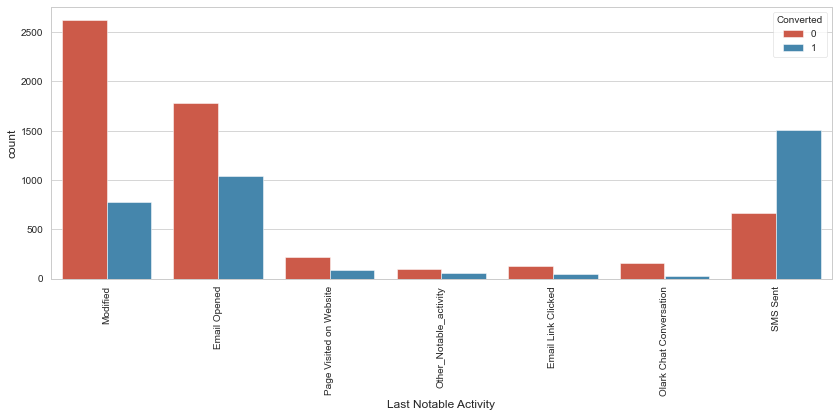

In [85]:
#Last Notable Activity vs Converted value
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()


In [86]:
#Now let's check the list of dropped columns and drop them totally 
drop_cols

['Country',
 'What matters most to you in choosing a course',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Magazine',
 'Digital Advertisement',
 'Through Recommendations',
 'Newspaper',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [87]:
leads = leads.drop(drop_cols,1)


Unwanted columns have been dropped 

In [89]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Specialization                          9240 non-null   obje

# Outlier treatment

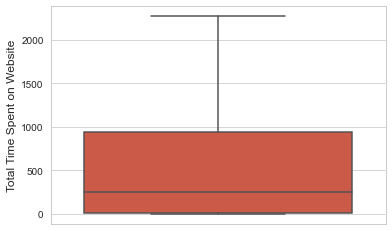

In [90]:
#Total Time Spent on Website
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

There aren't any outliers in this column , so no treatment required

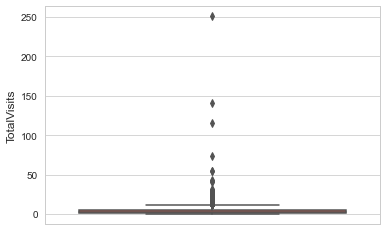

In [92]:
#Total Visits
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

Outliers can be found here

In [93]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

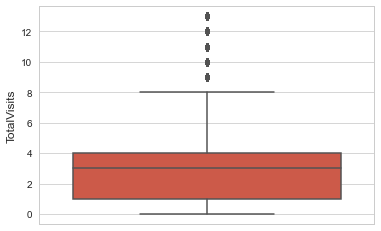

In [94]:
#Outlier Treatment: Remove top & bottom 2% of the outliers 

Q3 = leads.TotalVisits.quantile(0.98)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.02)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

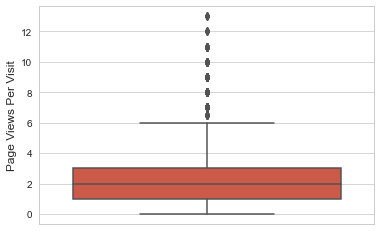

In [95]:
#Page Views Per Visit
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [96]:
leads['Page Views Per Visit'].describe()


count    9066.000000
mean        2.298612
std         1.979081
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: Page Views Per Visit, dtype: float64

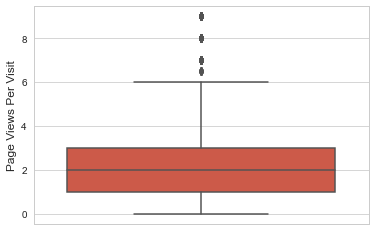

In [97]:
#Outlier Treatment: Remove top & bottom 1% of the Outlier 

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

## Numerical variable analysis 

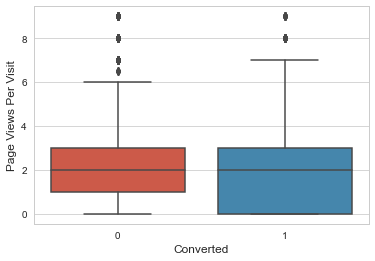

In [98]:
#'Page Views Per Visit" vs 'Converted variable'
sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

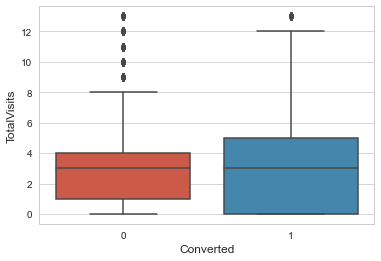

In [100]:
# "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

Median for converted and not converted leads are the close.

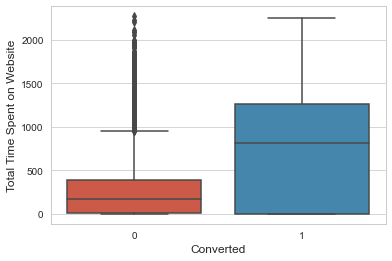

In [101]:
#"Total Time Spent on Website" vs Converted variable
sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

Website should be made more engaging as Leads spending more time 
on the website are more likely to be converted, so to make leads spend more time.

In [103]:
#Correlation Matrix
cor = leads.corr()
cor

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.026670,0.052300,0.021346,0.060879
Converted,0.026670,1.000000,0.043805,0.358538,-0.007357
TotalVisits,0.052300,0.043805,1.000000,0.355323,0.756926
Total Time Spent on Website,0.021346,0.358538,0.355323,1.000000,0.346034
Page Views Per Visit,0.060879,-0.007357,0.756926,0.346034,1.000000


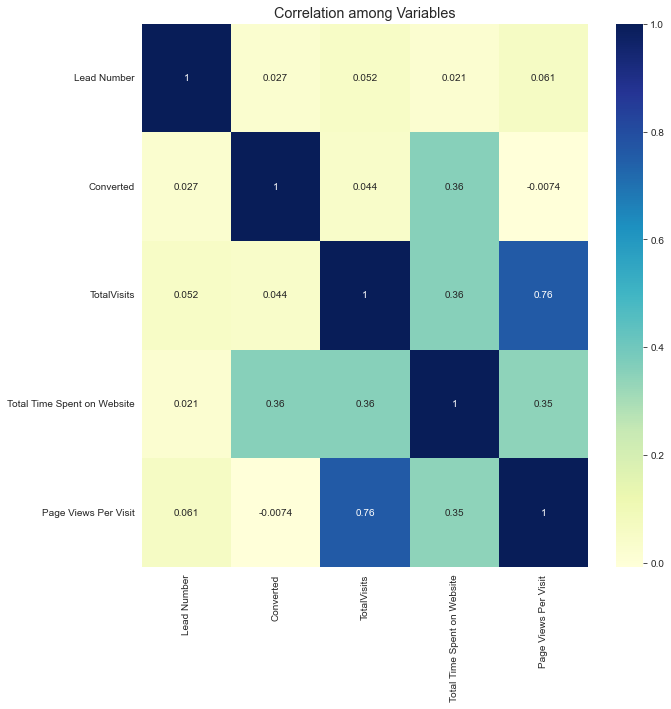

In [105]:
#Checking correlations of numeric values
## heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.title("Correlation among Variables")
plt.show()

# Creating dummy variables 

List of categorical columns

In [106]:
cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [107]:
leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Others,Management_Specializations,Unemployed,Will revert after reading the email,Mumbai,No,Other_Notable_activity
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Other_Tags,Mumbai,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Other_Tags,Mumbai,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Management_Specializations,Unemployed,Not Specified,Other Metro Cities,No,SMS Sent


So we have two columns 'A free copy of Mastering The Interview' & 'Do Not Email' to be changed to {0 ,1}

In [108]:
var_list =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[var_list] = leads[var_list].apply(binary_map)

Getting dummies and dropping the first column and adding the results to the master dataframe.


In [109]:
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [110]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [111]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [112]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [113]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [114]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [116]:
#dropping original columns

leads.drop(cat_cols,1,inplace = True)
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


# Logestic regression building model


Train-Test split


In [118]:
y = leads['Converted']
X=leads.drop('Converted', axis=1)

In [119]:
#Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)



Scaling of data

In [121]:
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
6804,-0.840425,-0.016875,-0.785601,-0.404001,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6592,-0.772027,-0.016875,0.106052,-0.404001,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4921,-0.189412,-0.390500,-0.572778,-0.135630,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9224,-1.606683,0.356749,-0.049896,0.937854,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5678,-0.459315,-0.016875,-0.229694,0.401112,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


 Feature Selection Using RFE

In [123]:
logregres = LogisticRegression()


In [124]:
rfe = RFE(logregres, 18)    
rfe = rfe.fit(X_train, y_train)

In [125]:
rfe.support_


array([False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False,  True,  True,  True, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False,  True])

In [126]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('Lead Number', False, 30),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 8),
 ('Lead Origin_Quick Add Form', False, 42),
 ('What is your current occupation_Housewife', False, 22),
 ('What is your current occupation_Other', False, 37),
 ('What is your current occupation_Student', False, 14),
 ('What is your current occupation_Unemployed', False, 3),
 ('What is your current occupation_Working Professional', False, 21),
 ('City_Other Cities', False, 33),
 ('City_Other Cities of Maharashtra', False, 28),
 ('City_Other Metro Cities', False, 27),
 ('City_Thane & Outskirts', False, 32),
 ('City_Tier II Cities', False, 9),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_Olark Chat', False, 16),
 ('Lead Source_Organic Sea

In [127]:
X_train.columns[~rfe.support_]


Index(['Lead Number', 'TotalVisits', 'Page Views Per Visit', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'What is your current occupation_Housewife', 'What is your current occupation_Other', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'City_Other Cities', 'City_Other Cities of Maharashtra', 'City_Other Metro Cities', 'City_Thane & Outskirts', 'City_Tier II Cities', 'Lead Source_Live Chat', 'Lead Source_Olark Chat', 'Lead Source_Social Media', 'Lead Source_google', 'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Specialization_Banking, Investment And Insurance', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Special

In [128]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation', 'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'], dtype='object')

# Logestic regression model

In [130]:
#Model 1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6291
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1252.7
Date:                Sun, 12 Jun 2022   Deviance:                       2505.4
Time:                        20:10:23   Pearson chi2:                 1.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4157      0.126     -3.288      0.001      -0.663      -0.168
Total Time Spent on Website                  1.0584      0.061     17.402      0.000       0.939       1.178
Lead Origin_Lead Add Form                    2.3240      0.772      3.010      0.003       0.811       3.837
Lead Source_Direct Traffic                  -1.4939      0.172     -8.664      0.000      -1.832      -1.156
Lead Source_Google                          -1.1077      0.158     -7.005      0.000      -1.418      -0.798
Lead Source_Organic Search                  -1.2320      0.206     -5.994      0.000      -1.635      -0.829
Lead Source_Reference                       -2.3176      0.846     -2.738      0.006      -3.977      -0.659
Lead Source_Referral Sites                  -1.2086      0.504     -2.397      0.017      -2.197      -0.220
Lead Source_Welingak Website                 2.1443      1.054      2.034      0.042       0.078       4.211
Last Activity_Email Bounced                 -1.6918      0.450     -3.761      0.000      -2.573      -0.810
Last Activity_Olark Chat Conversation       -1.2477      0.234     -5.328      0.000      -1.707      -0.789
Tags_Closed by Horizzon                      6.4610      0.737      8.763      0.000       5.016       7.906
Tags_Interested in other courses            -2.1535      0.409     -5.269      0.000      -2.955      -1.352
Tags_Lost to EINS                            5.4186      0.534     10.154      0.000       4.373       6.464
Tags_Other_Tags                             -2.5523      0.220    -11.622      0.000      -2.983      -2.122
Tags_Ringing                                -3.6833      0.265    -13.893      0.000      -4.203      -3.164
Tags_Will revert after reading the email     4.3305      0.183     23.691      0.000       3.972       4.689
Last Notable Activity_Modified              -0.7840      0.135     -5.824      0.000      -1.048      -0.520
Last Notable Activity_SMS Sent               2.2151      0.134     16.498      0.000       1.952       2.478
============================================================================================================
"""

In [137]:
## Dropping the variables with p-values greater than 0.05
col = col.drop(['Lead_Source_Reference', 'Lead_Source_Welingak Website'])
col


VIF values

In [139]:
#Model 2
X_train_sm = sm.add_constant(X_train[col])

logm3 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm3.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6292
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.9
Date:                Sun, 12 Jun 2022   Deviance:                       2509.8
Time:                        20:17:04   Pearson chi2:                 1.02e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4107      0.126     -3.250      0.001      -0.658      -0.163
Total Time Spent on Website                  1.0585      0.061     17.381      0.000       0.939       1.178
Lead Origin_Lead Add Form                    3.6980      0.477      7.748      0.000       2.763       4.633
Lead Source_Direct Traffic                  -1.4911      0.172     -8.645      0.000      -1.829      -1.153
Lead Source_Google                          -1.1069      0.158     -6.998      0.000      -1.417      -0.797
Lead Source_Organic Search                  -1.2286      0.206     -5.975      0.000      -1.632      -0.826
Lead Source_Reference                       -3.6888      0.592     -6.228      0.000      -4.850      -2.528
Lead Source_Referral Sites                  -1.2109      0.504     -2.401      0.016      -2.199      -0.223
Last Activity_Email Bounced                 -1.8094      0.451     -4.016      0.000      -2.692      -0.926
Last Activity_Olark Chat Conversation       -1.2474      0.234     -5.326      0.000      -1.706      -0.788
Tags_Closed by Horizzon                      6.4686      0.737      8.771      0.000       5.023       7.914
Tags_Interested in other courses            -2.1521      0.409     -5.265      0.000      -2.953      -1.351
Tags_Lost to EINS                            5.4270      0.534     10.159      0.000       4.380       6.474
Tags_Other_Tags                             -2.5543      0.220    -11.630      0.000      -2.985      -2.124
Tags_Ringing                                -3.7051      0.267    -13.879      0.000      -4.228      -3.182
Tags_Will revert after reading the email     4.3316      0.183     23.666      0.000       3.973       4.690
Last Notable Activity_Modified              -0.7935      0.134     -5.906      0.000      -1.057      -0.530
Last Notable Activity_SMS Sent               2.2093      0.134     16.476      0.000       1.947       2.472
============================================================================================================
"""

In [140]:
#Prediction on train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.06103613, 0.88195831, 0.10679828, ..., 0.20634678, 0.03056383,
       0.0026192 ])

Creating the DataFrame with Actual Converted and Predicted Probabilities


In [141]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.061036,6804
1,0,0.881958,6592
2,0,0.106798,4921
3,0,0.010814,9224
4,0,0.064411,5678


Creating a new column Predicted with 1 if Probability > 0.5


In [142]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.061036,6804,0
1,0,0.881958,6592,1
2,0,0.106798,4921,0
3,0,0.010814,9224,0
4,0,0.064411,5678,0


Confusion matrix

In [143]:
confusion = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted)
confusion

array([[3741,  161],
       [ 292, 2116]], dtype=int64)

In [144]:
#overall accuracy 
print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted))


0.9282091917591125


Metrics beyond Simple Accuracy


In [145]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Calculation of Sensitivity and Specificity

In [146]:
#Sensitivity
TP / float(TP+FN)


0.8787375415282392

In [147]:
#Specificity
TN / float(TN+FP)


0.9587391081496668

In [148]:
#false postive rate - predicting Converted when lead does not have converted
print(FP/ float(TN+FP))


0.041260891850333166


In [149]:
# positive predictive value 
print (TP / float(TP+FP))

0.9292929292929293


In [150]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9275973220927349


# Plotting of ROC curve

In [151]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [152]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob,
                                         drop_intermediate = False)

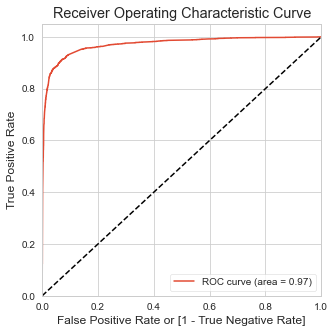

In [153]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


#  Finding Optimal Cutoff Point
### Optimal cutoff probability is that probability where we get balanced sensitivity and specificity.



In [154]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.061036,6804,0,1,0,0,0,0,0,0,0,0,0
1,0,0.881958,6592,1,1,1,1,1,1,1,1,1,1,0
2,0,0.106798,4921,0,1,1,0,0,0,0,0,0,0,0
3,0,0.010814,9224,0,1,0,0,0,0,0,0,0,0,0
4,0,0.064411,5678,0,1,0,0,0,0,0,0,0,0,0


In [155]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381616     1.000000     0.000000
0.1   0.1  0.838352     0.969684     0.757304
0.2   0.2  0.894929     0.951827     0.859815
0.3   0.3  0.921395     0.914867     0.925423
0.4   0.4  0.924723     0.898671     0.940800
0.5   0.5  0.928209     0.878738     0.958739
0.6   0.6  0.927417     0.859219     0.969503
0.7   0.7  0.924406     0.841777     0.975397
0.8   0.8  0.909192     0.789452     0.983086
0.9   0.9  0.886371     0.716777     0.991030


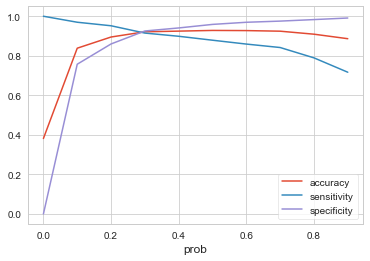

In [156]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.


In [158]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.061036,6804,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.881958,6592,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.106798,4921,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.010814,9224,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.064411,5678,0,1,0,0,0,0,0,0,0,0,0,0


In [159]:
#overall accuracy
print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted))


0.9213946117274168


In [160]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted)
confusion

array([[3611,  291],
       [ 205, 2203]], dtype=int64)

Metrics beyond Simple Accuracy with 0.3 as Optimal Cutoff point


In [161]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [162]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9148671096345515

In [163]:
# Let us calculate specificity
TN / float(TN+FP)

0.9254228600717581

In [164]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07457713992824193


In [165]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8833199679230153


In [166]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9462788259958071


Precision and Recall

In [167]:
# Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8833199679230153

In [168]:
# Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.9148671096345515

# Precision and Recall Tradeoff


In [169]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


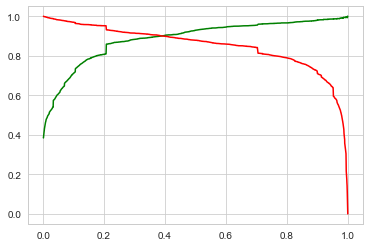

In [170]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#  Making Predictions on the Test Set

In [171]:
# Scaling the Numerical Variables
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [172]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
2781,-0.884673,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8231,-0.827798,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1721,1.792119,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5226,-0.802113,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4912,-0.242537,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [173]:
X_test_sm = sm.add_constant(X_test)


In [174]:
# Predictions on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

2781    0.105214
8231    0.017790
1721    0.986961
5226    0.028078
4912    0.001741
dtype: float64

In [175]:
# Converting y_pred to a DataFrame
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2781,0.105214
8231,0.017790
1721,0.986961
5226,0.028078
4912,0.001741


In [176]:
# Converting y_test to DataFrame
y_test_df = pd.DataFrame(y_test)

In [177]:
# Putting 'Prospect ID' to index
y_test_df['Prospect ID'] = y_test_df.index

In [178]:
# Removing index for both DataFrames to concatenate them side by side
y_pred_1.reset_index(drop= True, inplace= True)
y_test_df.reset_index(drop= True, inplace= True)

In [179]:
# Concatenating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,2781,0.105214
1,0,8231,0.017790
2,1,1721,0.986961
3,0,5226,0.028078
4,0,4912,0.001741


In [180]:
# Renaming the column
y_pred_final = y_pred_final.rename(columns = {0: 'Converted_Prob'})

In [181]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID', 'Converted', 'Converted_Prob']]
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,2781,0,0.105214
1,8231,0,0.017790
2,1721,1,0.986961
3,5226,0,0.028078
4,4912,0,0.001741


In [184]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted,Final_Pred
0,2781,0,0.105214,0,0
1,8231,0,0.017790,0,0
2,1721,1,0.986961,1,1
3,5226,0,0.028078,0,0
4,4912,0,0.001741,0,0


In [185]:
# Overall Accuracy
metrics.accuracy_score(y_true= y_pred_final.Converted, y_pred= y_pred_final.Final_Predicted)

0.9260628465804066

In [186]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_true= y_pred_final.Converted, y_pred= y_pred_final.Final_Predicted)
confusion2

array([[1543,  108],
       [  92,  962]], dtype=int64)

In [187]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [188]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9127134724857685

In [189]:
# Let us calculate specificity
TN / float(TN+FP)

0.9345850999394306

In [190]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.06541490006056935


In [191]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8990654205607477


In [192]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9437308868501529


In [194]:
precision_score(y_pred_final.Converted , y_pred_final.Final_Predicted)


0.8990654205607477

# Final observations 
## Train data:
### Accuracy : 92.15%
### Sensitivity : 91.49%
### Specificity : 92.50%

## Test Data:
### Accuracy : 92.57%
### Sensitivity : 91.19%
### Specificity : 93.45%

